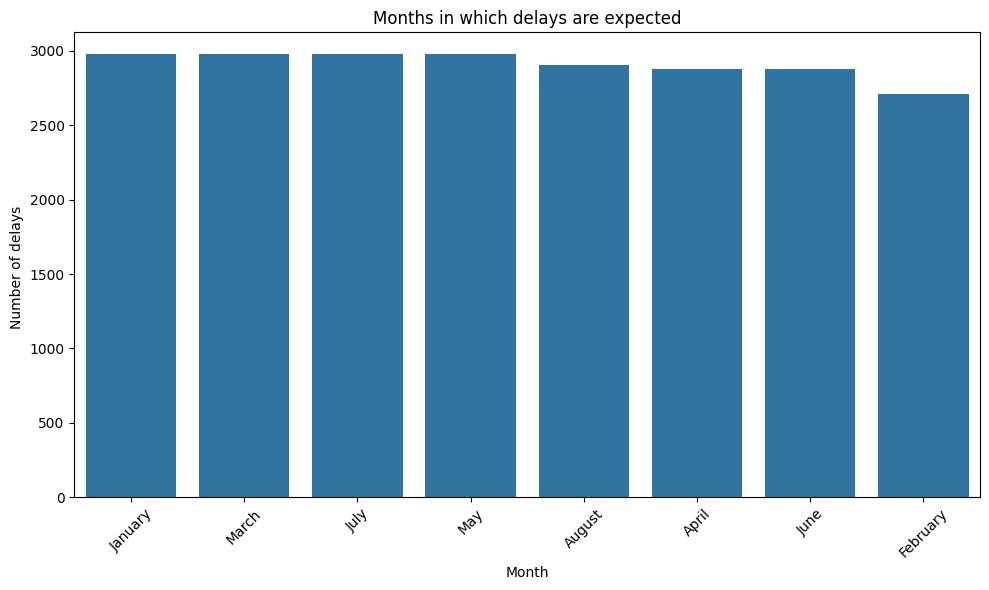

Months in which delays are expected:
- January: 2976 delays
- March: 2976 delays
- July: 2976 delays
- May: 2976 delays
- August: 2905 delays
- April: 2880 delays
- June: 2880 delays
- February: 2712 delays


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("../Data/cleaned_supply_chain_logistics_dataset.csv")

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date']) # Fixed: Removed extra space before this line

# Extract month
df['month'] = df['date'].dt.month_name()

# Delayed deliveries per month
delayed_deliveries_per_month = df[df['delay_category'] != 'Ontime']['month'].value_counts()

# Calculate the total number of delayed deliveries
total_delayed_deliveries = delayed_deliveries_per_month.sum()

# Calculate the threshold for significant delay (e.g., average delays per month)
average_delays_per_month = total_delayed_deliveries / 12  # Assuming 12 months

# Filter months with higher than average delays
high_delay_months = delayed_deliveries_per_month[delayed_deliveries_per_month > average_delays_per_month]

# Sort the series by the actual number of delays
high_delay_months = high_delay_months.sort_values(ascending=False)

# Plotting the months with high delays
plt.figure(figsize=(10, 6))
sns.barplot(x=high_delay_months.index, y=high_delay_months.values)
plt.title('Months in which delays are expected')
plt.xlabel('Month')
plt.ylabel('Number of delays ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the months with high delays
print("Months in which delays are expected:")
for month, count in high_delay_months.items():
  print(f"- {month}: {count} delays")

Mean Squared Error: 15.39


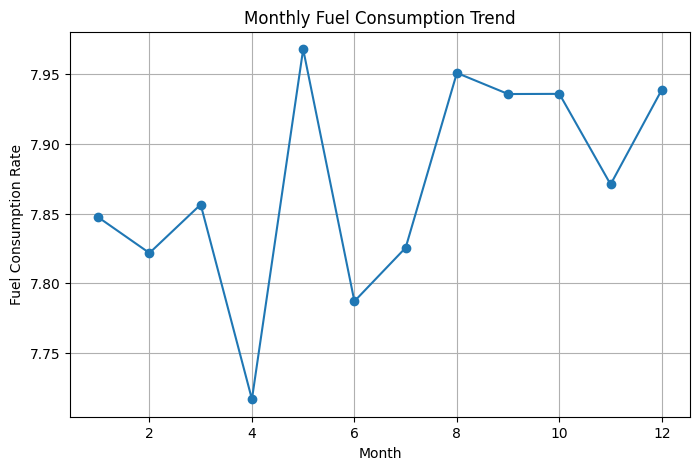

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load data
file_path = "../Data/cleaned_supply_chain_logistics_dataset.csv"
# Use pd.read_csv to read a CSV file
df = pd.read_csv(file_path) # Changed from pd.read_excel to pd.read_csv

# Prepare data
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
df = df.dropna(subset=['fuel_consumption_rate', 'distance', 'traffic_congestion_level'])

# Features and target
X = df[['distance', 'traffic_congestion_level']]
y = df['fuel_consumption_rate']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Monthly trend
monthly_consumption = df.groupby('month')['fuel_consumption_rate'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(monthly_consumption.index, monthly_consumption.values, marker='o')
plt.title('Monthly Fuel Consumption Trend')
plt.xlabel('Month')
plt.ylabel('Fuel Consumption Rate')
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import Seaborn

# ... (rest of your code)

# Plot using seaborn style
# plt.style.use('seaborn-vibrant') # Remove this line - incorrect style name
sns.set_theme(style="whitegrid")  # Or any other Seaborn style you prefer (e.g., 'darkgrid', 'white', 'ticks')
plt.figure(figsize=(12, 6))

for col in selected_trends.columns:
    plt.plot(selected_trends.index, selected_trends[col], label=f'Region {col}', linewidth=2, marker='o')

# ... (rest of your plotting code)

NameError: name 'selected_trends' is not defined

<Figure size 1200x600 with 0 Axes>

<ipython-input-10-d86e18c95594>:7: DtypeWarning: Columns (1,3,7,8,9,10,12,13,15,16,17,18,19,20,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_supply_chain_logistics_dataset.csv", on_bad_lines='skip') # Added on_bad_lines='skip'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


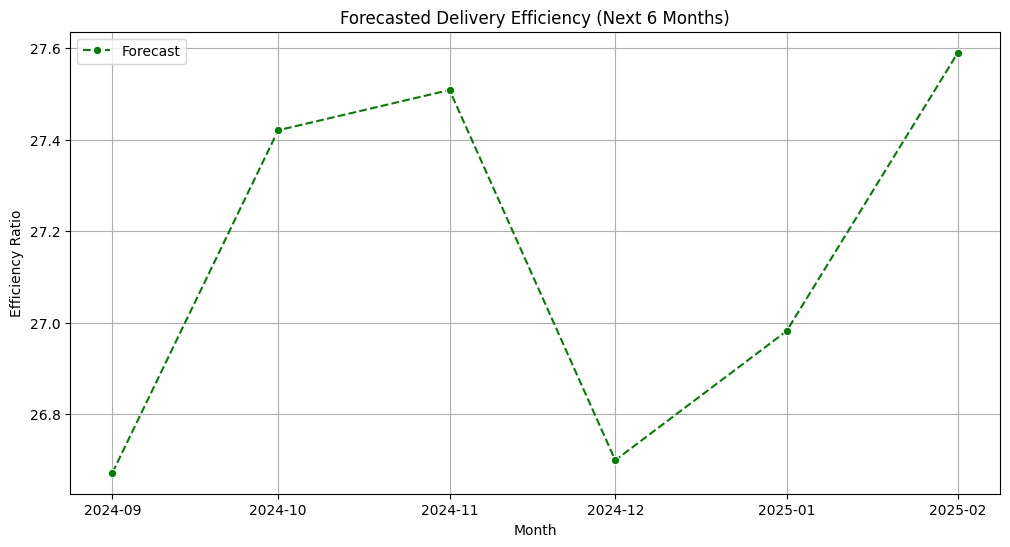

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Read the dataset with error handling for bad lines
df = pd.read_csv("/content/cleaned_supply_chain_logistics_dataset.csv", on_bad_lines='skip') # Added on_bad_lines='skip'

# Convert date to datetime, handling errors
df['date'] = pd.to_datetime(df['date'], errors='coerce') # Added errors='coerce'

# Remove rows with invalid dates (NaT)
df = df.dropna(subset=['date'])

# Extract year and month
df['year_month'] = df['date'].dt.to_period('M')

# Aggregate: total shipments and successful deliveries per month
monthly_kpi = df.groupby('year_month').agg(
    total_shipments=('delivery_efficiency', 'count'),
    successful_deliveries=('delivery_efficiency', 'sum')
).reset_index()

# Calculate delivery efficiency
monthly_kpi['delivery_efficiency'] = monthly_kpi['successful_deliveries'] / monthly_kpi['total_shipments']

# Convert year_month back to datetime
monthly_kpi['year_month'] = monthly_kpi['year_month'].dt.to_timestamp()

# Prepare time series
ts = monthly_kpi.set_index('year_month')['delivery_efficiency']

# Fit SARIMA model
model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast next 6 months
forecast = results.get_forecast(steps=6)
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')
forecast_values = forecast.predicted_mean

# Plot only the forecast
plt.figure(figsize=(12,6))
sns.lineplot(x=forecast_index, y=forecast_values, marker='o', label='Forecast', color='green', linestyle='--')

plt.title('Forecasted Delivery Efficiency (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Efficiency Ratio')
plt.legend()
plt.grid(True)
plt.show()

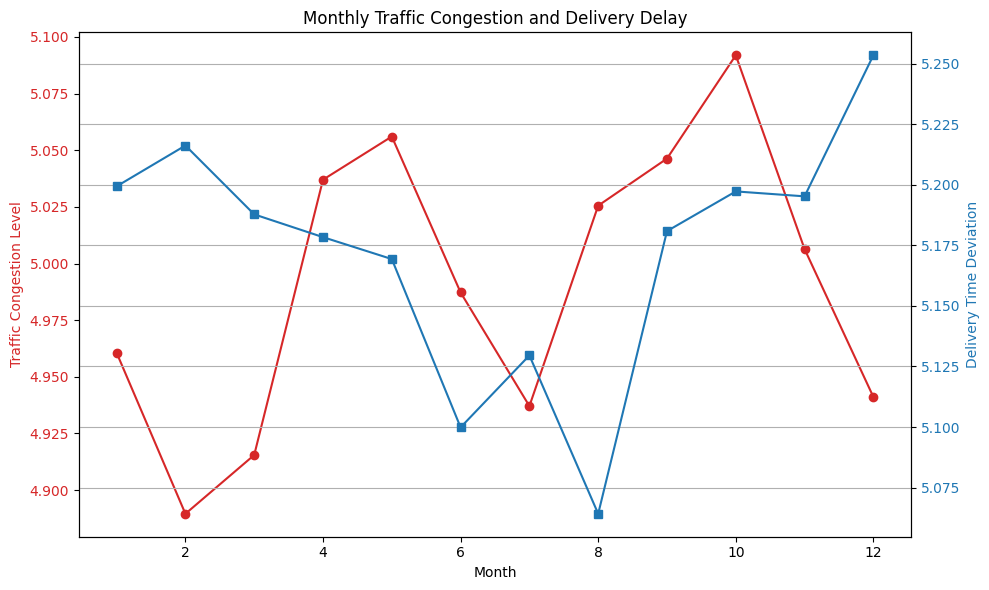

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
df = df[['timestamp', 'traffic_congestion_level', 'delivery_time_deviation']].dropna()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

# Convert columns to numeric, handling errors
df['traffic_congestion_level'] = pd.to_numeric(df['traffic_congestion_level'], errors='coerce')
df['delivery_time_deviation'] = pd.to_numeric(df['delivery_time_deviation'], errors='coerce')

# Drop rows with invalid values after conversion
df = df.dropna(subset=['traffic_congestion_level', 'delivery_time_deviation'])

# Group by month: calculate average congestion and delay
monthly = df.groupby('month')[['traffic_congestion_level', 'delivery_time_deviation']].mean()

# Plot congestion level and delivery delay per month
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Monthly Traffic Congestion and Delivery Delay')
ax1.set_xlabel('Month')
ax1.set_ylabel('Traffic Congestion Level', color='tab:red')
ax1.plot(monthly.index, monthly['traffic_congestion_level'], marker='o', color='tab:red', label='Traffic Congestion')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Add second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Delivery Time Deviation', color='tab:blue')
ax2.plot(monthly.index, monthly['delivery_time_deviation'], marker='s', color='tab:blue', label='Delivery Delay')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.grid(True)
plt.show()